In [1]:
from typing import Callable
from dataclasses import dataclass
from evaluation.eval_analysis import (
    find_shared_proofs,
    filter_all_successful,
    EvalDict,
    PlotInfo,
    time_key,
    expanded_key,
    get_combined_num_proofs_by_metric,
    SuccessMetric,
    LengthRange,
)
import numpy as np
import matplotlib.pyplot as plt

/home/ubuntu/coq-modeling/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2023-12-19 22:54:42,845] [INFO] [real_accelerator.py:158:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [2]:
EVAL_DIRS = [
    ("Finetuned full dataset", "/home/ubuntu/coq-modeling/evals/codellama-7b-basic-rnd-split"),
    ("Finetuned 15% dataset", "/home/ubuntu/coq-modeling/evals/codellama-7b-basic-rnd-split-rnd-samp-15-pct"),
    ("Finetuned 8% dataset", "/home/ubuntu/coq-modeling/evals/codellama-7b-basic-rnd-split-rnd-samp-8-pct"),
    ("Finetuned 8% dataset w/ tpe", "/home/ubuntu/coq-modeling/evals/codellama-7b-tpe-1k-rnd-split-rnd-samp-8-pct"),
]

In [3]:
eval_dirs = [b for _, b in EVAL_DIRS]
shared_proof_names = find_shared_proofs(eval_dirs)

In [4]:
eval_dicts = [EvalDict.from_shared_proofs(e, p, shared_proof_names) for e, p in EVAL_DIRS]

In [5]:

def get_matching_x_axes(
    eval_dicts: list[EvalDict], metric: SuccessMetric
) -> tuple[list[PlotInfo], PlotInfo]:
    plot_infos = [ed.get_num_proofs_by_metric(metric) for ed in eval_dicts]
    max_metric = max([p.xs[-1] for p in plot_infos])

    for plot_info in plot_infos:
        if plot_info.xs[-1] != max_metric:
            plot_info.xs.append(max_metric)
            plot_info.ys.append(plot_info.ys[-1])
    
    combined_plot_info = get_combined_num_proofs_by_metric(eval_dicts, metric)
    if combined_plot_info.xs[-1] != max_metric:
        combined_plot_info.xs.append(max_metric)
        combined_plot_info.ys.append(combined_plot_info.ys[-1])

    return plot_infos, combined_plot_info 


  

AttributeError: 'dict' object has no attribute 'qed_node'

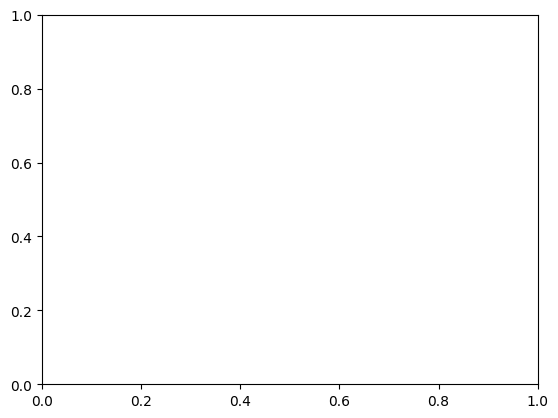

In [7]:
fig, ax = plt.subplots()
assert type(ax) == plt.Axes

plot_infos, combined_plot_info = get_matching_x_axes(eval_dicts, time_key)

for plot_info in plot_infos: 
    ax.plot(plot_info.xs, plot_info.ys, label=plot_info.name)

ax.plot(combined_plot_info.xs, combined_plot_info.ys, "--", label=combined_plot_info.name, color="black", alpha=0.5,)

ax.legend()
ax.set_xlabel("Time(s)")
ax.set_ylabel("# Proofs Found")
ax.set_title(f"# Proofs found out of {len(shared_proof_names)} Theorems.")


In [ ]:
plot_infos

[PlotInfo(xs=[8.32655412, 8.672147814, 10.592763368, 10.610466385, 11.073943107, 11.376307753, 12.691207042, 12.875208973, 14.872596275, 14.90088511, 15.061745938, 15.309219626, 16.907517773, 18.164155565, 18.991327046, 19.25475403, 20.026570871, 21.368979282, 22.11222261, 22.232527776, 22.250746439, 22.653604619, 23.887366829, 26.821330061, 27.248835366, 31.114246969, 32.069951006, 32.850546656, 34.171707957, 34.313109895, 35.264544913, 35.4836946, 37.067472755, 39.118640123, 39.318902635, 39.588955964, 39.60962341, 40.996813592, 41.354621384, 41.819773051, 42.607674679, 43.303833167, 43.928898286, 44.277558142, 44.491609719, 45.762307892, 47.089427083, 48.952611754, 50.125615887, 50.364193459, 52.129124978, 52.391509625, 52.850749746, 55.381630592, 56.20268159, 57.505991293, 57.776875093, 57.840126842, 57.940227136, 62.204465684, 63.258545093, 65.931763054, 68.191700706, 68.596865441, 72.916483206, 73.933608558, 74.091381291, 74.243728019, 75.756902098, 77.320594723, 82.149226981, 84

Text(0.5, 1.0, '# Proofs Found out of 516 Theorems.')

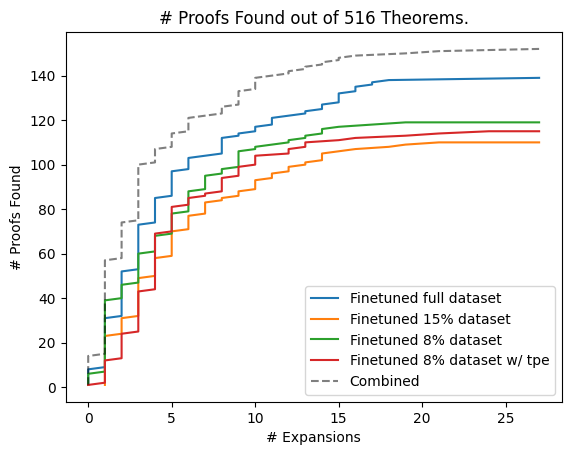

In [ ]:
fig, ax = plt.subplots()
assert type(ax) == plt.Axes

plot_infos, combined_plot_info = get_matching_x_axes(eval_dicts, expanded_key)

for plot_info in plot_infos: 
    ax.plot(plot_info.xs, plot_info.ys, label=plot_info.name)

ax.plot(combined_plot_info.xs, combined_plot_info.ys, "--", label=combined_plot_info.name, color="black", alpha=0.5,)


ax.legend()
ax.set_xlabel("# Expansions")
ax.set_ylabel("# Proofs Found")
ax.set_title(f"# Proofs Found out of {len(shared_proof_names)} Theorems.")

In [ ]:
ranges = [
    LengthRange(0, 5),
    LengthRange(6, 10),
    LengthRange(11, 2000),
]

In [ ]:
from importlib import reload
from evaluation import eval_analysis
reload(eval_analysis)
from evaluation.eval_analysis import (
    find_shared_proofs,
    EvalDict,
    PlotInfo,
    time_key,
    expanded_key,
    get_combined_num_proofs_by_metric,
    SuccessMetric,
    LengthRange,
)

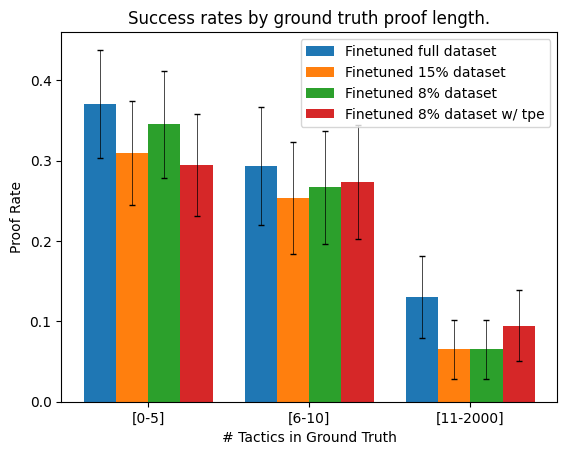

In [ ]:
rates_by_eval = [e.get_proof_rate_by_length(ranges) for e in eval_dicts] 
fig, ax = plt.subplots()

bar_width = 0.8 / len(rates_by_eval)
xs = np.arange(len(ranges))
for i, (eval_dict, rates) in enumerate(zip(eval_dicts, rates_by_eval)):
    shift_factor = bar_width * (i - (len(rates_by_eval) // 2))
    if len(rates_by_eval) % 2 == 0:
        shift_factor += bar_width / 2
    
    plot_xs = xs + shift_factor
    plot_ys = [r.rate() for r in rates]
    plot_errs = [r.margin() for r in rates]

    ax.errorbar(plot_xs, plot_ys, yerr=plot_errs, fmt="none", ecolor="black", capsize=2, elinewidth=0.5)
    ax.bar(plot_xs, plot_ys, bar_width, label=eval_dict.eval_name)

ax.set_title("Success rates by ground truth proof length.")
ax.set_xticks(xs)
ax.set_xticklabels([r.label() for r in ranges])
ax.set_xlabel("# Tactics in Ground Truth")
ax.set_ylabel("Proof Rate")
ax.legend()


Text(0.5, 1.0, 'Time taken on a set of 88 mutually successful proofs.')

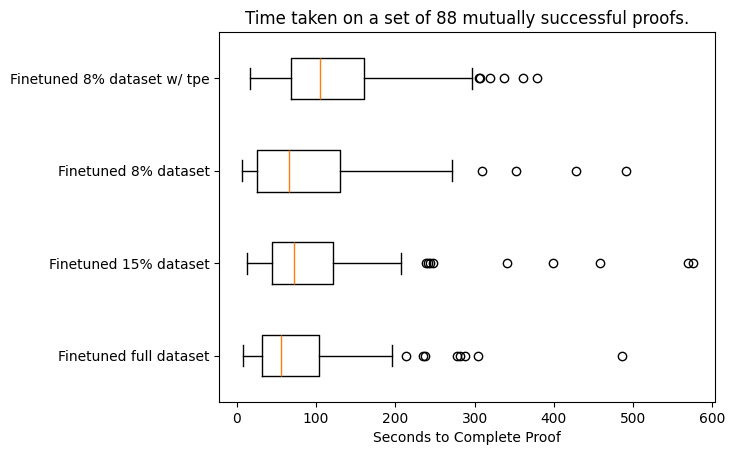

In [ ]:
all_successful_proofs = filter_all_successful(shared_proof_names, eval_dicts)
filtered_dicts = [e.filter(all_successful_proofs) for e in eval_dicts]
times = [e.get_successful_times() for e in filtered_dicts]
labels = [e.eval_name for e in filtered_dicts]

fig, ax = plt.subplots()
ax.boxplot(times, vert=False, labels=labels)
ax.set_xlabel("Seconds to Complete Proof")
ax.set_title(f"Time taken on a set of {len(all_successful_proofs)} mutually successful proofs.")

In [ ]:
import math
1.96 * math.sqrt((2 / 8) * (6 / 8) / 8)

0.3000624934909393

In [ ]:
[(r, r.margin()) for r in eval_dicts[0].get_proof_rate_by_length(ranges)]

[(Successes: 73, Attempts: 197, 0.06744177698652944),
 (Successes: 44, Attempts: 150, 0.07286155801955539),
 (Successes: 22, Attempts: 169, 0.05073363992335247)]